# Лабораторная работа №3

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('JobSurveyIndia.csv')
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [23]:
data.dtypes

Unnamed: 0                 int64
Employment Sector         object
Employment Background     object
Public Dealing            object
Degree                    object
IdealNumberOfWorkdays    float64
IdealYearlyIncome         object
dtype: object

In [24]:
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [25]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
data['IdealYearlyIncome'].nunique()

4

<Axes: >

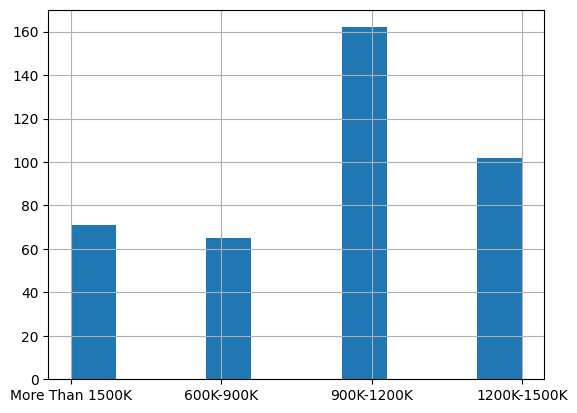

In [27]:
data['IdealYearlyIncome'].hist()

# 2. Задача классификации

Задача классификации была выбрана, т.к. в любом случае будет возвращаться значение зависимой переменной IdealYearlyIncome от независимых переменных

# 3. Предобратока данных

Ниже будут объеденены пункты B и D в функции для выполнения кодирования категориальных переменных, а так же заполнения пустых значений.

### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

- ##### Перевод из категориальных переменных в численные для удобства в дальнейшем
Создаются функции для замены категориальных значений в наборе данных, таких как Keys и Mode, на числовые значения. Keys преобразуются в соответствующие им частоты фортепианных клавиш, а Mode преобразуется с помощью метода One-Hot-Encoding (т. е. мажор = 1, минор = 0).

- ##### Обработка пустых значений
Нечисловые значения в наборе данных заменяются на NaN, а затем NaN и отсутствующие значения заменяются на медиану

- ##### Перевод в Int
Все столбцы атрибутов преобразованы к целочисленному типу данных для обеспечения единообразия

In [28]:
data.isnull().sum()

Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

В нашем случае пропусков не обнаружено

In [29]:
# Создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()

# Кодируем переменные типа object
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

print(data)

     Employment Sector  Employment Background  Public Dealing  Degree  \
0                    2                      3               0       1   
1                    2                      1               1       2   
2                    1                      3               0       1   
3                    1                      2               2       2   
4                    2                      3               0       1   
..                 ...                    ...             ...     ...   
395                  2                      2               1       2   
396                  1                      2               2       0   
397                  1                      2               2       0   
398                  1                      2               0       0   
399                  0                      2               2       0   

     IdealNumberOfWorkdays  IdealYearlyIncome  
0                      4.0                  3  
1                      4.0 

In [30]:
data['IdealNumberOfWorkdays'] = data['IdealNumberOfWorkdays'].astype('int32')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Employment Sector      400 non-null    int32
 1   Employment Background  400 non-null    int32
 2   Public Dealing         400 non-null    int32
 3   Degree                 400 non-null    int32
 4   IdealNumberOfWorkdays  400 non-null    int32
 5   IdealYearlyIncome      400 non-null    int32
dtypes: int32(6)
memory usage: 9.5 KB


In [32]:
data.head()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,2,3,0,1,4,3
1,2,1,1,2,4,1
2,1,3,0,1,6,2
3,1,2,2,2,4,2
4,2,3,0,1,5,0


### C. Нормирование численных переменных датасета

In [33]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = [ 'IdealNumberOfWorkdays']

trans = MinMaxScaler()

data[numeric_columns] = trans.fit_transform(data[numeric_columns])

data[numeric_columns] = pd.DataFrame(data[numeric_columns])

data[numeric_columns].head()


,IdealNumberOfWorkdays
0,0.000000
1,0.000000
2,0.666667
3,0.000000
4,0.333333


### A. Разделение выборки на тестовую и тренировочную 

In [34]:
data.describe()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,1.147500,2.010000,1.100000,0.85250,0.300833,1.505000
std,0.712047,0.906617,0.931219,0.79203,0.268663,1.057246
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.00000,0.333333,2.000000
75%,2.000000,3.000000,2.000000,1.25000,0.333333,2.000000
max,2.000000,3.000000,2.000000,2.00000,1.000000,3.000000


In [35]:
X = data.drop(columns=['IdealYearlyIncome'])
y = data['IdealYearlyIncome']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=17)

# 4. Обучение на тренировочном множестве

In [37]:
# Обучение и оценка моделей
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr'),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=7),
    'Decision Tree(k=3)': DecisionTreeClassifier(max_depth=3),
    'Decision Tree(k=5)': DecisionTreeClassifier(max_depth=5),
    'Decision Tree(k=7)': DecisionTreeClassifier(max_depth=7),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# 5. Подсчет метрик на train и test множествах (Задача классификации)

Модель: Logistic Regression
Accuracy: 0.6375
ROC-AUC: 0.8492860278057796
F1-score: 0.6214473684210526


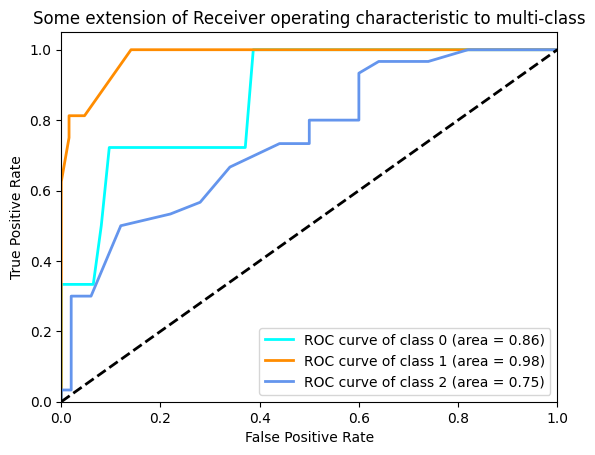

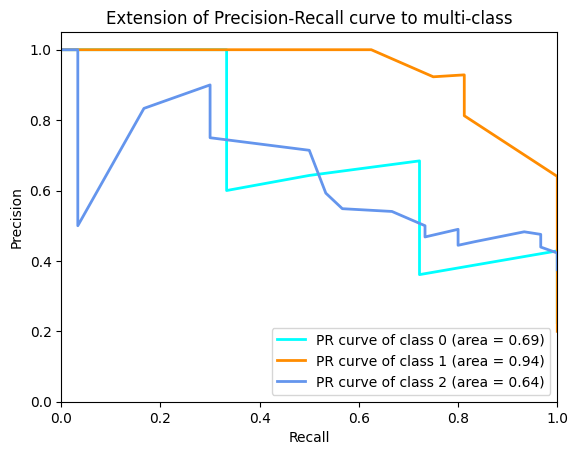

Модель: KNN (k=3)
Accuracy: 0.6875
ROC-AUC: 0.895685550375224
F1-score: 0.6734449606400826


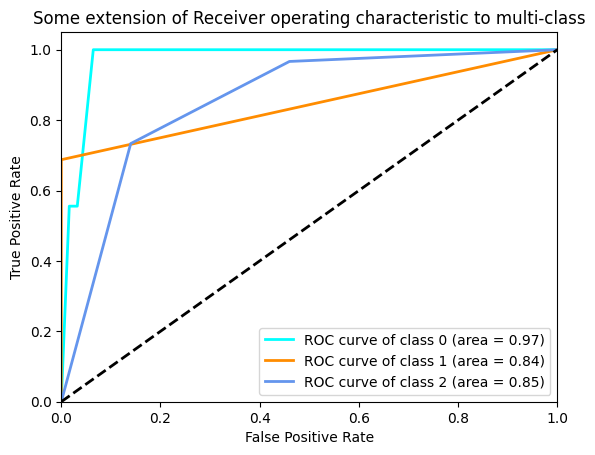

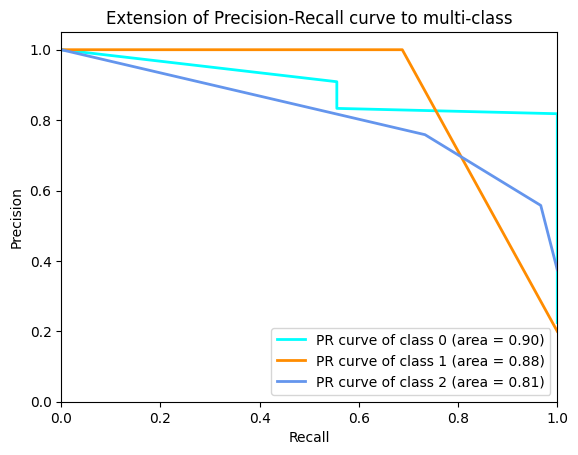

Модель: KNN (k=5)
Accuracy: 0.75
ROC-AUC: 0.9112416344646057
F1-score: 0.751651695160823


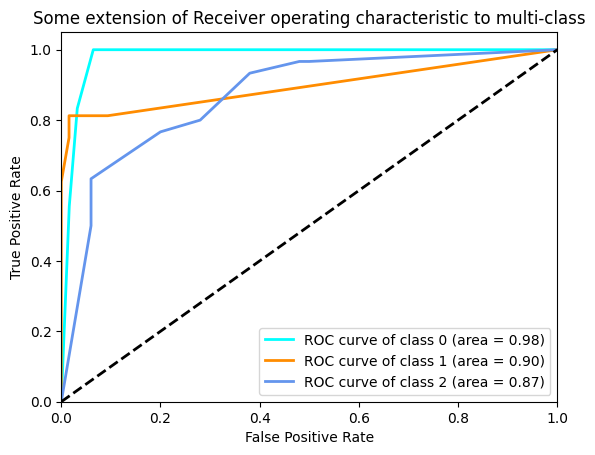

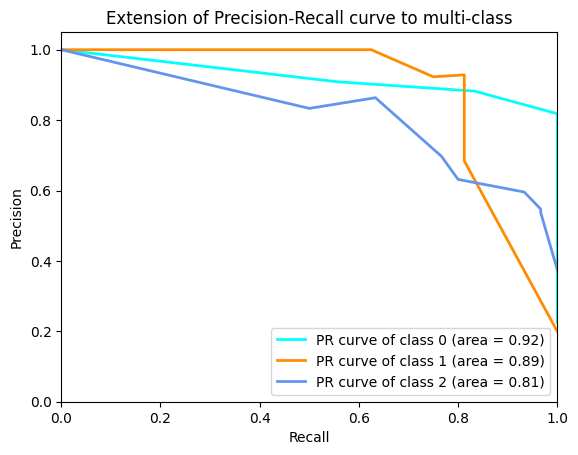

Модель: Decision Tree(k=3)
Accuracy: 0.6
ROC-AUC: 0.8561893726198477
F1-score: 0.5810589973633451


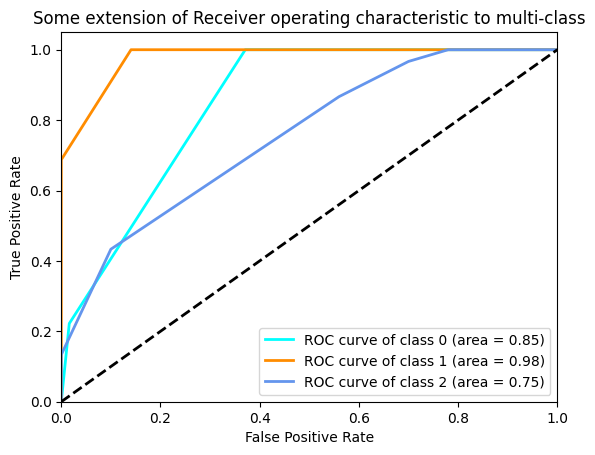

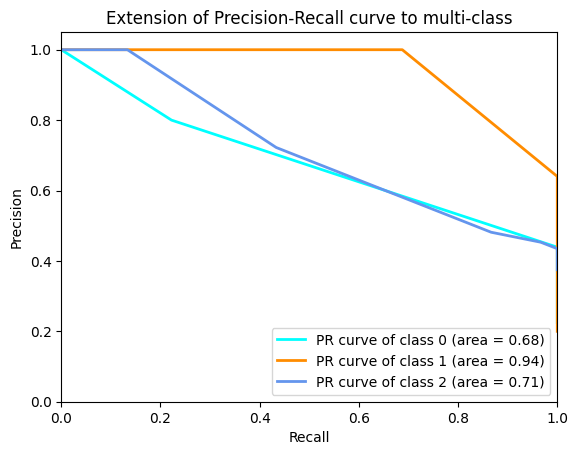

Модель: Decision Tree(k=5)
Accuracy: 0.675
ROC-AUC: 0.8960232414874552
F1-score: 0.6613107145022038


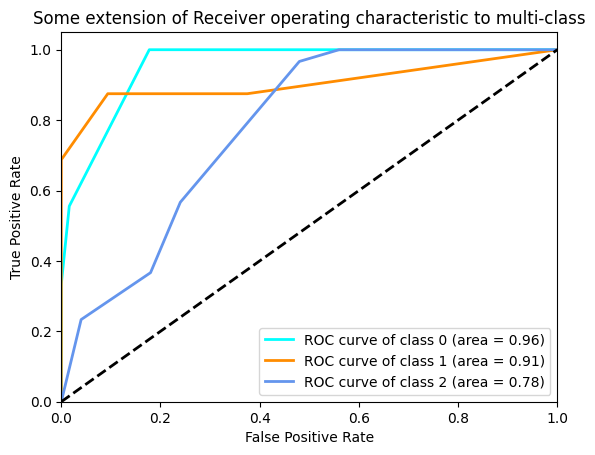

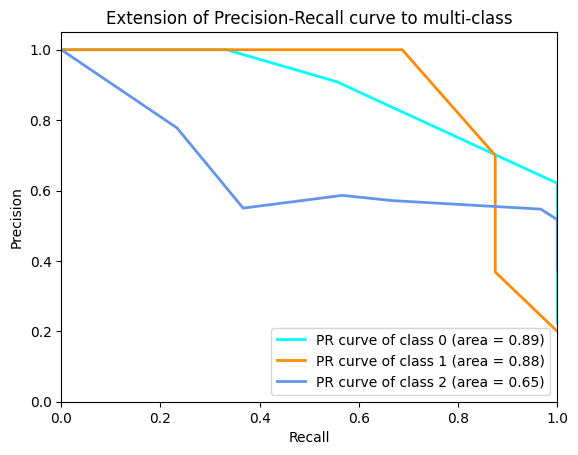

Модель: Decision Tree(k=7)
Accuracy: 0.7375
ROC-AUC: 0.9096302398353495
F1-score: 0.7220168476747425


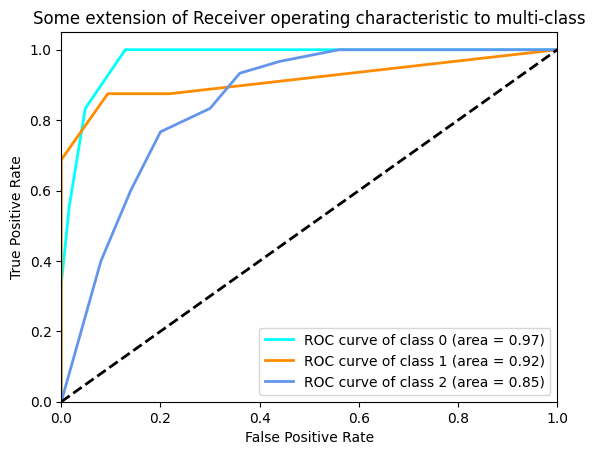

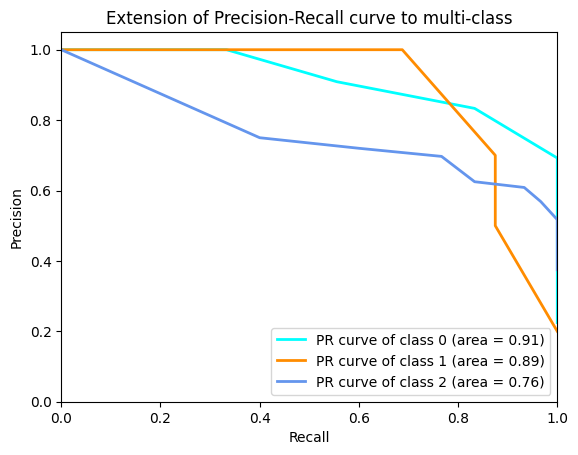

Модель: Random Forest
Accuracy: 0.75
ROC-AUC: 0.9541893096158154
F1-score: 0.741226804384699


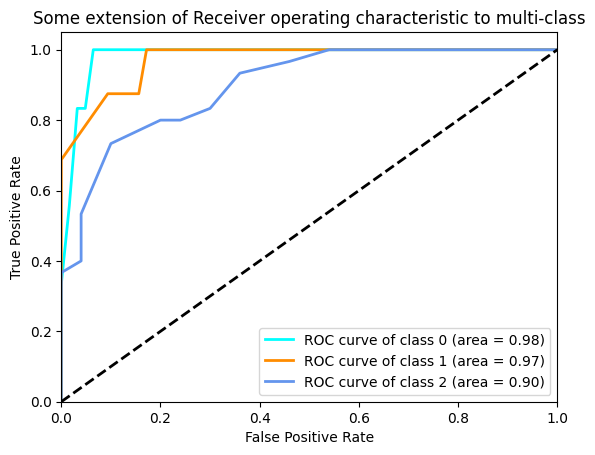

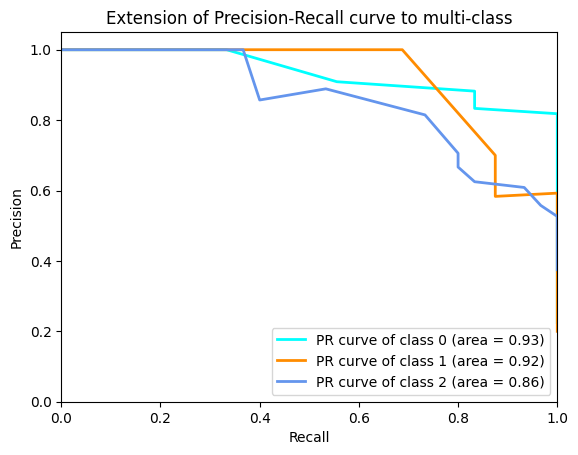

In [46]:
# Обучение моделей и расчет метрик
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    f1 = f1_score(y_test, y_pred,average='weighted')

    print(f"Модель: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"F1-score: {f1}")

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle

    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
        pr_auc[i] = auc(recall[i], precision[i])

    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                label='PR curve of class {0} (area = {1:0.2f})'
                ''.format(i, pr_auc[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class')
    plt.legend(loc="lower right")
    plt.show()

# 6. Сравнение метрик

In [55]:
for name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Предсказания для обучающего набора
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)
    
    # Предсказания для тестового набора
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)
    
    # Вычисление метрик для обучающего набора
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_proba,multi_class='ovr')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Вычисление метрик для тестового набора
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_proba,multi_class='ovr')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Сохранение метрик
    train_metrics[name] = [train_accuracy, train_roc_auc, train_f1]
    test_metrics[name] = [test_accuracy, test_roc_auc, test_f1]

In [57]:
best_model = None
best_score = 0

overfitting_models = []
underfitting_models = []

for name in models.keys():
    print(f"Модель: {name}")
    
    train_accuracy, train_roc_auc, train_f1 = train_metrics[name]
    test_accuracy, test_roc_auc, test_f1 = test_metrics[name]
    
    print(f"Train точность: {train_accuracy}, Test точность: {test_accuracy}")
    print(f"Train ROC-AUC: {train_roc_auc}, Test ROC-AUC: {test_roc_auc}")
    print(f"Train F1-score: {train_f1}, Test F1-score: {test_f1}")
    
    # Проверка на переобучение
    if train_accuracy > test_accuracy or train_roc_auc > test_roc_auc or train_f1 > test_f1:
        overfitting_models.append(name)
    
    # Проверка на недообучение
    if train_accuracy < 0.7 or train_roc_auc < 0.7 or train_f1 < 0.7:
        underfitting_models.append(name)
    
    # Поиск лучшей модели
    if test_roc_auc > best_score:
        best_score = test_roc_auc
        best_model = name



Модель: Logistic Regression
Train точность: 0.64375, Test точность: 0.6375
Train ROC-AUC: 0.8379836062628829, Test ROC-AUC: 0.8492860278057796
Train F1-score: 0.6360102312236505, Test F1-score: 0.6214473684210526
Модель: KNN (k=3)
Train точность: 0.7875, Test точность: 0.6875
Train ROC-AUC: 0.9304505138330174, Test ROC-AUC: 0.895685550375224
Train F1-score: 0.7804380957804493, Test F1-score: 0.6734449606400826
Модель: KNN (k=5)
Train точность: 0.821875, Test точность: 0.75
Train ROC-AUC: 0.9417552510449616, Test ROC-AUC: 0.9112416344646057
Train F1-score: 0.8226494590906475, Test F1-score: 0.751651695160823
Модель: Decision Tree(k=3)
Train точность: 0.675, Test точность: 0.6
Train ROC-AUC: 0.8733695738251613, Test ROC-AUC: 0.8561893726198477
Train F1-score: 0.6630551182375257, Test F1-score: 0.5810589973633451
Модель: Decision Tree(k=5)
Train точность: 0.765625, Test точность: 0.675
Train ROC-AUC: 0.938483510999909, Test ROC-AUC: 0.8960232414874552
Train F1-score: 0.7619940324033663, T

In [58]:

print(f"\nЛучшая модель: {best_model}")
print(f"Модели с переобучением: {overfitting_models}")
print(f"Модели с недообучением: {underfitting_models}")
print("\nДля улучшения метрик моделей можно попробовать следующее:")
print("- Настройка гиперпараметров модели")
print("- Использование других моделей")
print("- Добавление больше данных")
print("- Использование ансамблевых методов")


Лучшая модель: Random Forest
Модели с переобучением: ['Logistic Regression', 'KNN (k=3)', 'KNN (k=5)', 'Decision Tree(k=3)', 'Decision Tree(k=5)', 'Decision Tree(k=7)', 'Random Forest']
Модели с недообучением: ['Logistic Regression', 'Decision Tree(k=3)']

Для улучшения метрик моделей можно попробовать следующее:
- Настройка гиперпараметров модели
- Использование других моделей
- Добавление больше данных
- Использование ансамблевых методов


В данном случае была выбрана модель Random Forest как самая оптимальная, так же модель обучилась корректно и переобучения или недообучения не наблюдается.